## Ex.1 Visualizing data from "Titanic" dataset

*3 points*

This exercise is based on dataset from the legendary [Kaggle](kaggle.com) Titanic ML competition avaiable [here](https://www.kaggle.com/competitions/titanic/overview).

Data and their description can be downloaded from [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).




#### 1.1 Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.2 Import the dataset from [here](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv"
df = pd.read_csv(url)

#### 1.3  Set PassengerId as the index

In [3]:
df.set_index("PassengerId" , inplace= True )


#### 1.4 Create a pie chart presenting the male/female proportion

* for all passangers
* for surviving passengers

What is your conclusion?


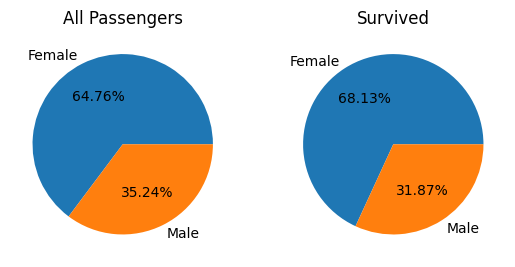

In [4]:
fig , (ax1,ax2)= plt.subplots(1 ,  2)
ax1.pie(df.Sex.value_counts(),  labels= ["Female" , "Male"] , autopct="%1.2f%%")
ax1.set_title("All Passengers")
ax2.pie(df[df["Survived"] == 1].Sex.value_counts() , labels= ["Female" , "Male"] , autopct="%1.2f%%")
ax2.set_title("Survived")
plt.show()
# Percentage of female survived is higher

#### 1.5. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

<Axes: xlabel='Fare', ylabel='Age'>

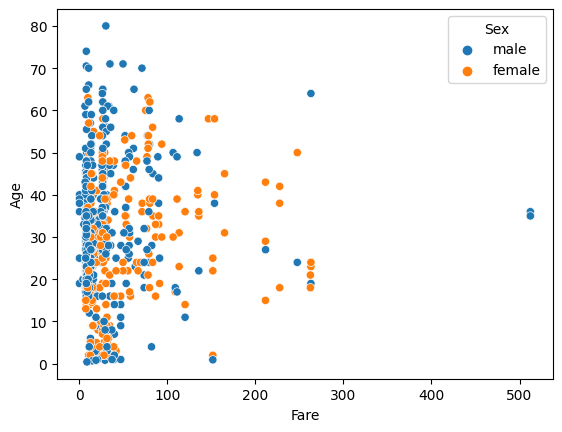

In [5]:
sns.scatterplot(x=df['Fare'], y=df['Age'], hue=df['Sex'])

Which chart would be more clear in your opinion?

In [6]:
#Pie Chart

#### 1.6 How many men older 45 survived?

In [7]:
df[df["Age"] > 45]["Sex"].value_counts()["male"]

73

#### 1.7  Create a histogram with the Fare payed

<Axes: ylabel='Frequency'>

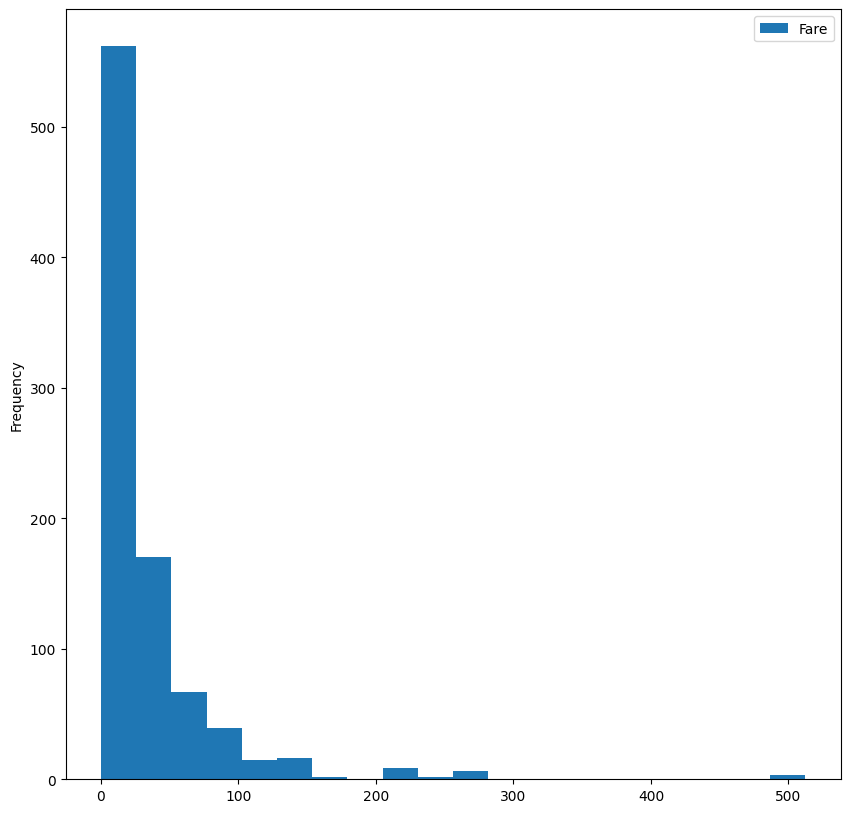

In [8]:
df.plot.hist(column = "Fare" , figsize = (10,10) , bins = 20)

#### 1.8 Сreate your own chart that you think would be useful

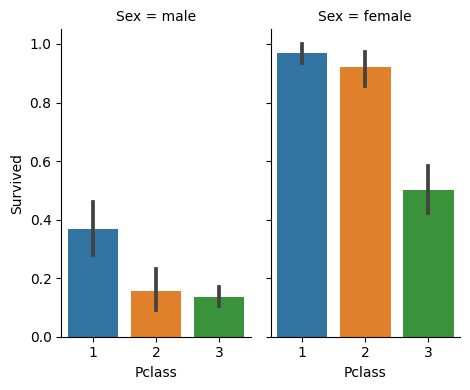

In [9]:
sns.catplot(
    data=df, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4, aspect=.6,
)

So, I hope this simple exercise did not cause you any difficulties. Time to move on to the next task. There is no longer any instruction on what charts to draw. You must decide for yourself

## Ex.2 Visualizing data from "Hose Prices" dataset

*7 points*

With 79 independent variables describing (nearly) every aspect of residential buildings in Ames, Iowa, this competition challenges you to predict the final price of each home.

In the very first step of your analysis, you need to
1. define the type of variab-les
2. visualize data
3. which variables do you think would be useful to transform?

The data and their description are [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

In [10]:
pip install missingno

In [11]:
!pip install kaggle

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [16]:
url = "https://raw.githubusercontent.com/kakarrot95/DataScience/main/HW2/train%20(1).csv"
dataset = pd.read_csv(url)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:

dataset.shape

In [ ]:
traindataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

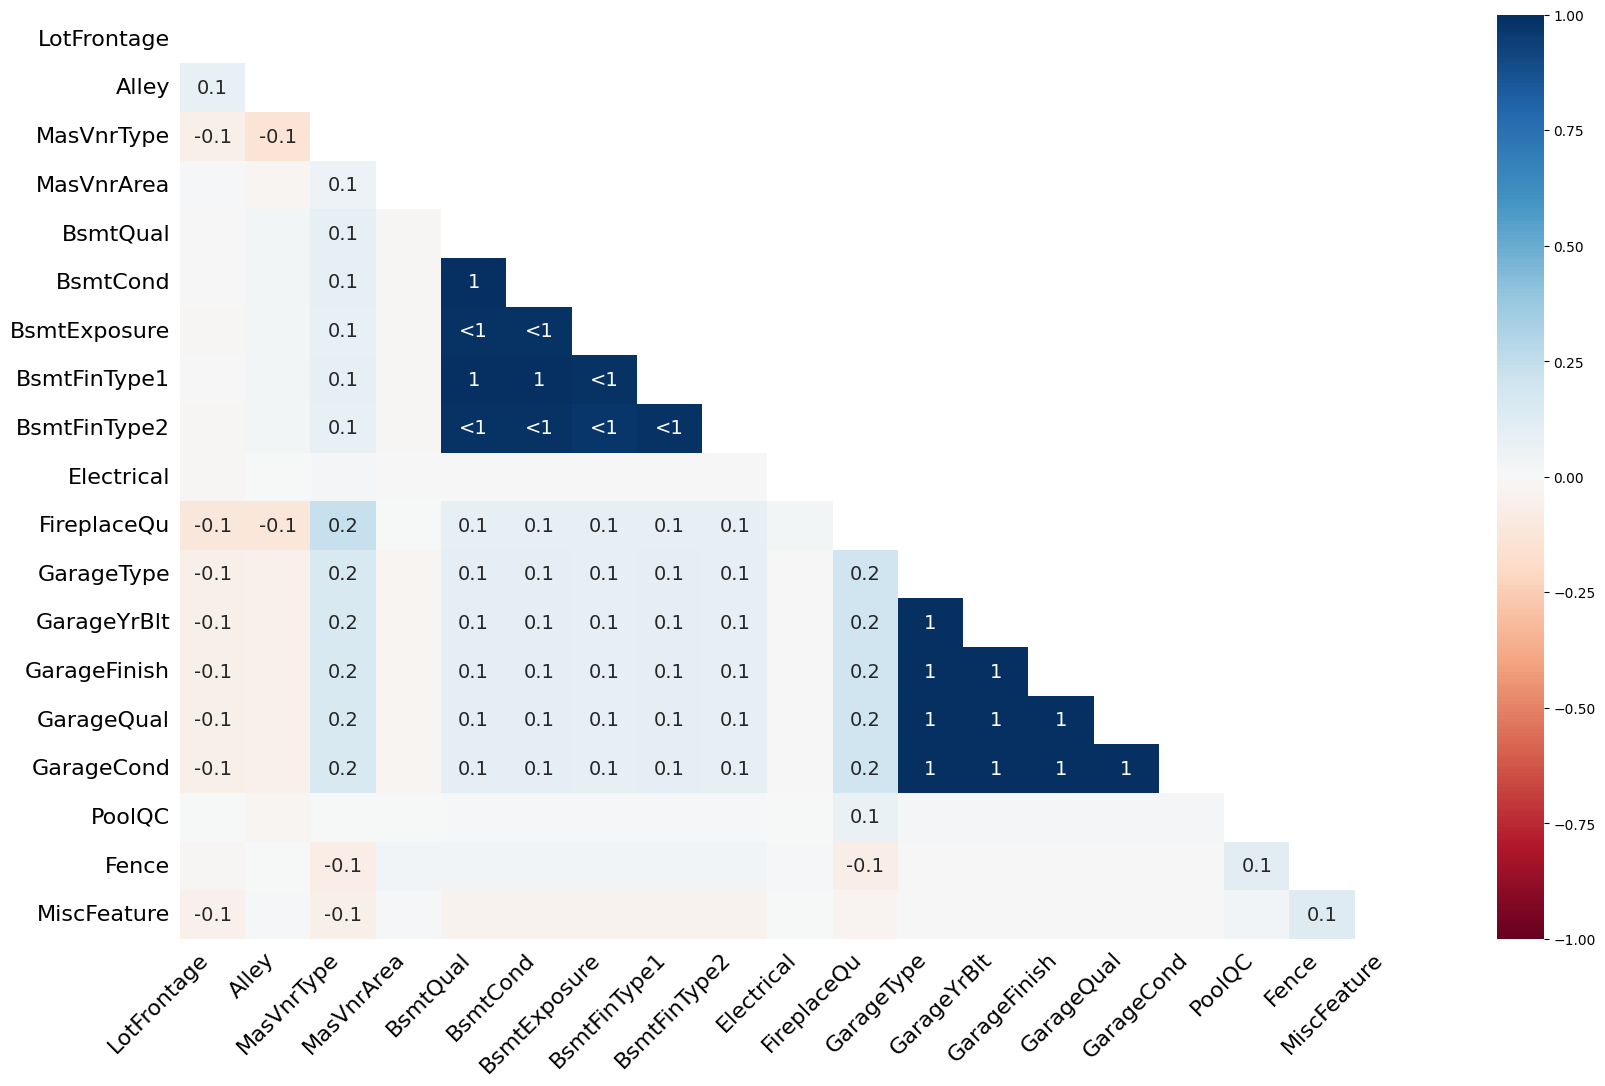

In [ ]:
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()


In [ ]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

NameError: ignored

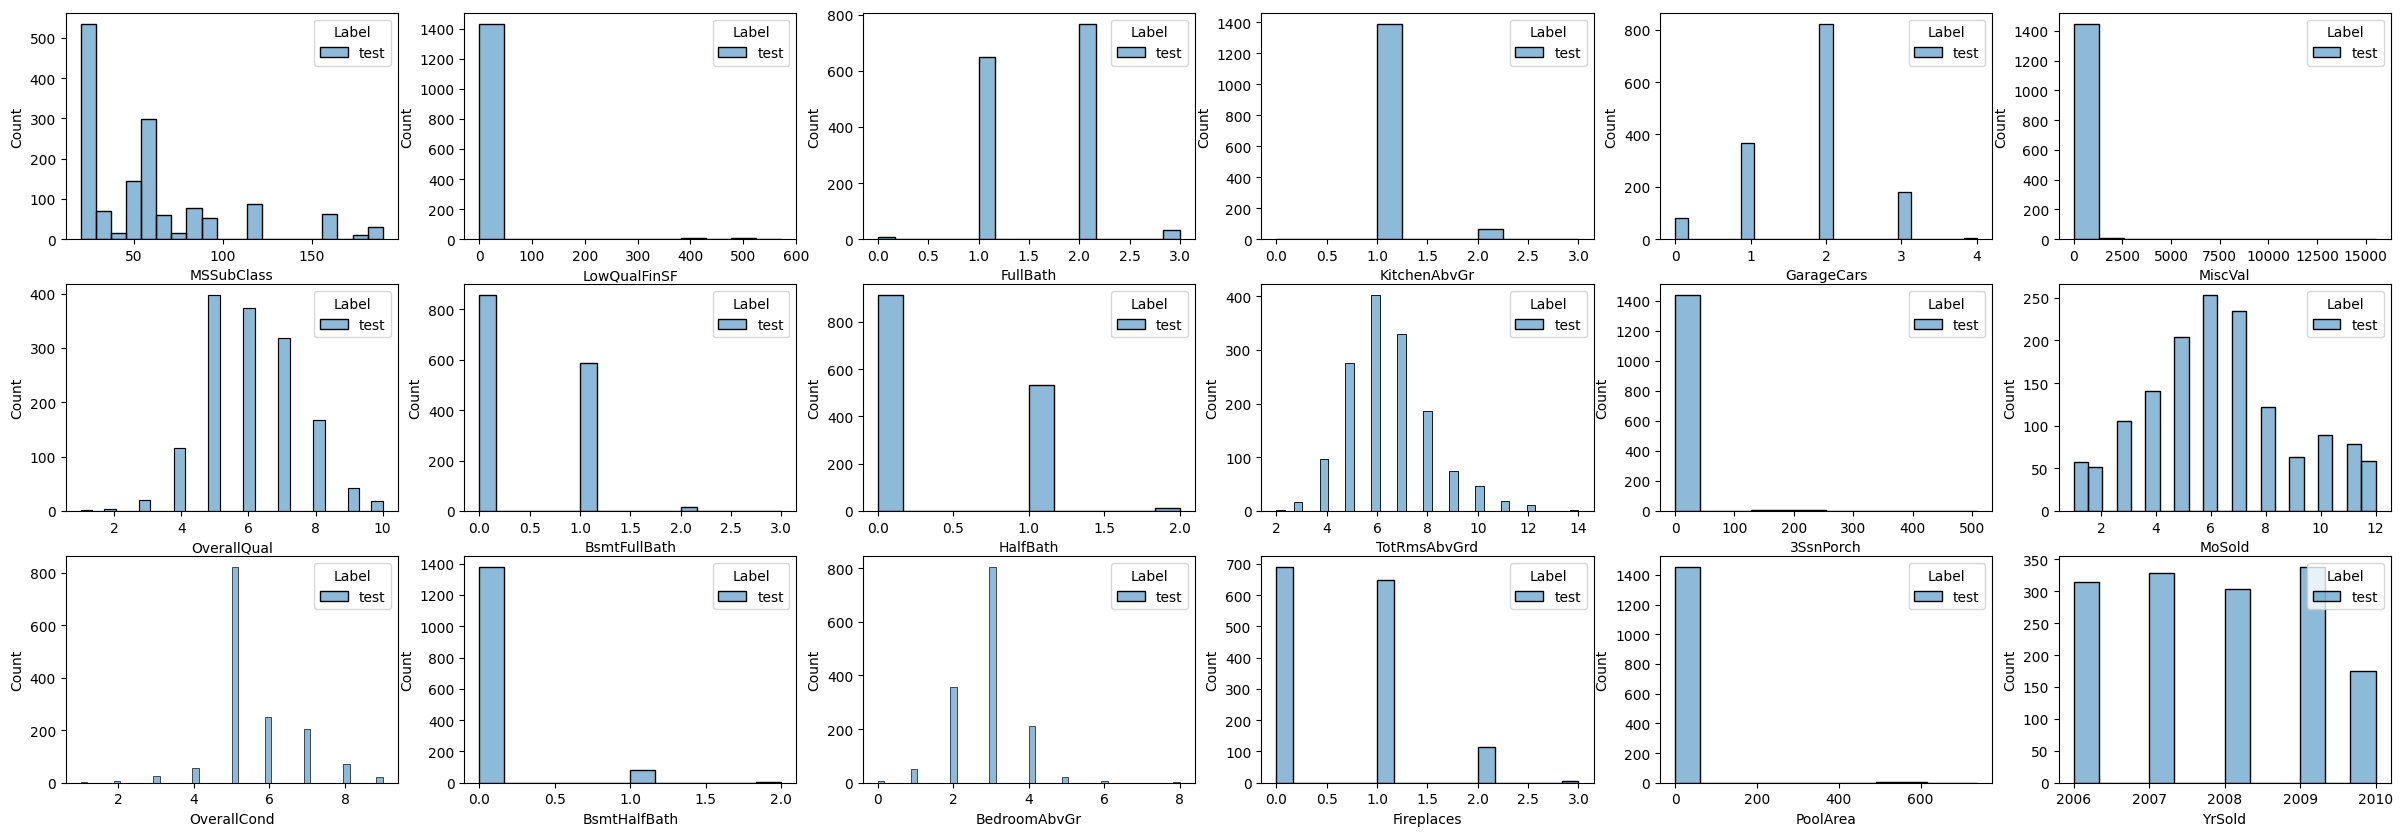

In [ ]:

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

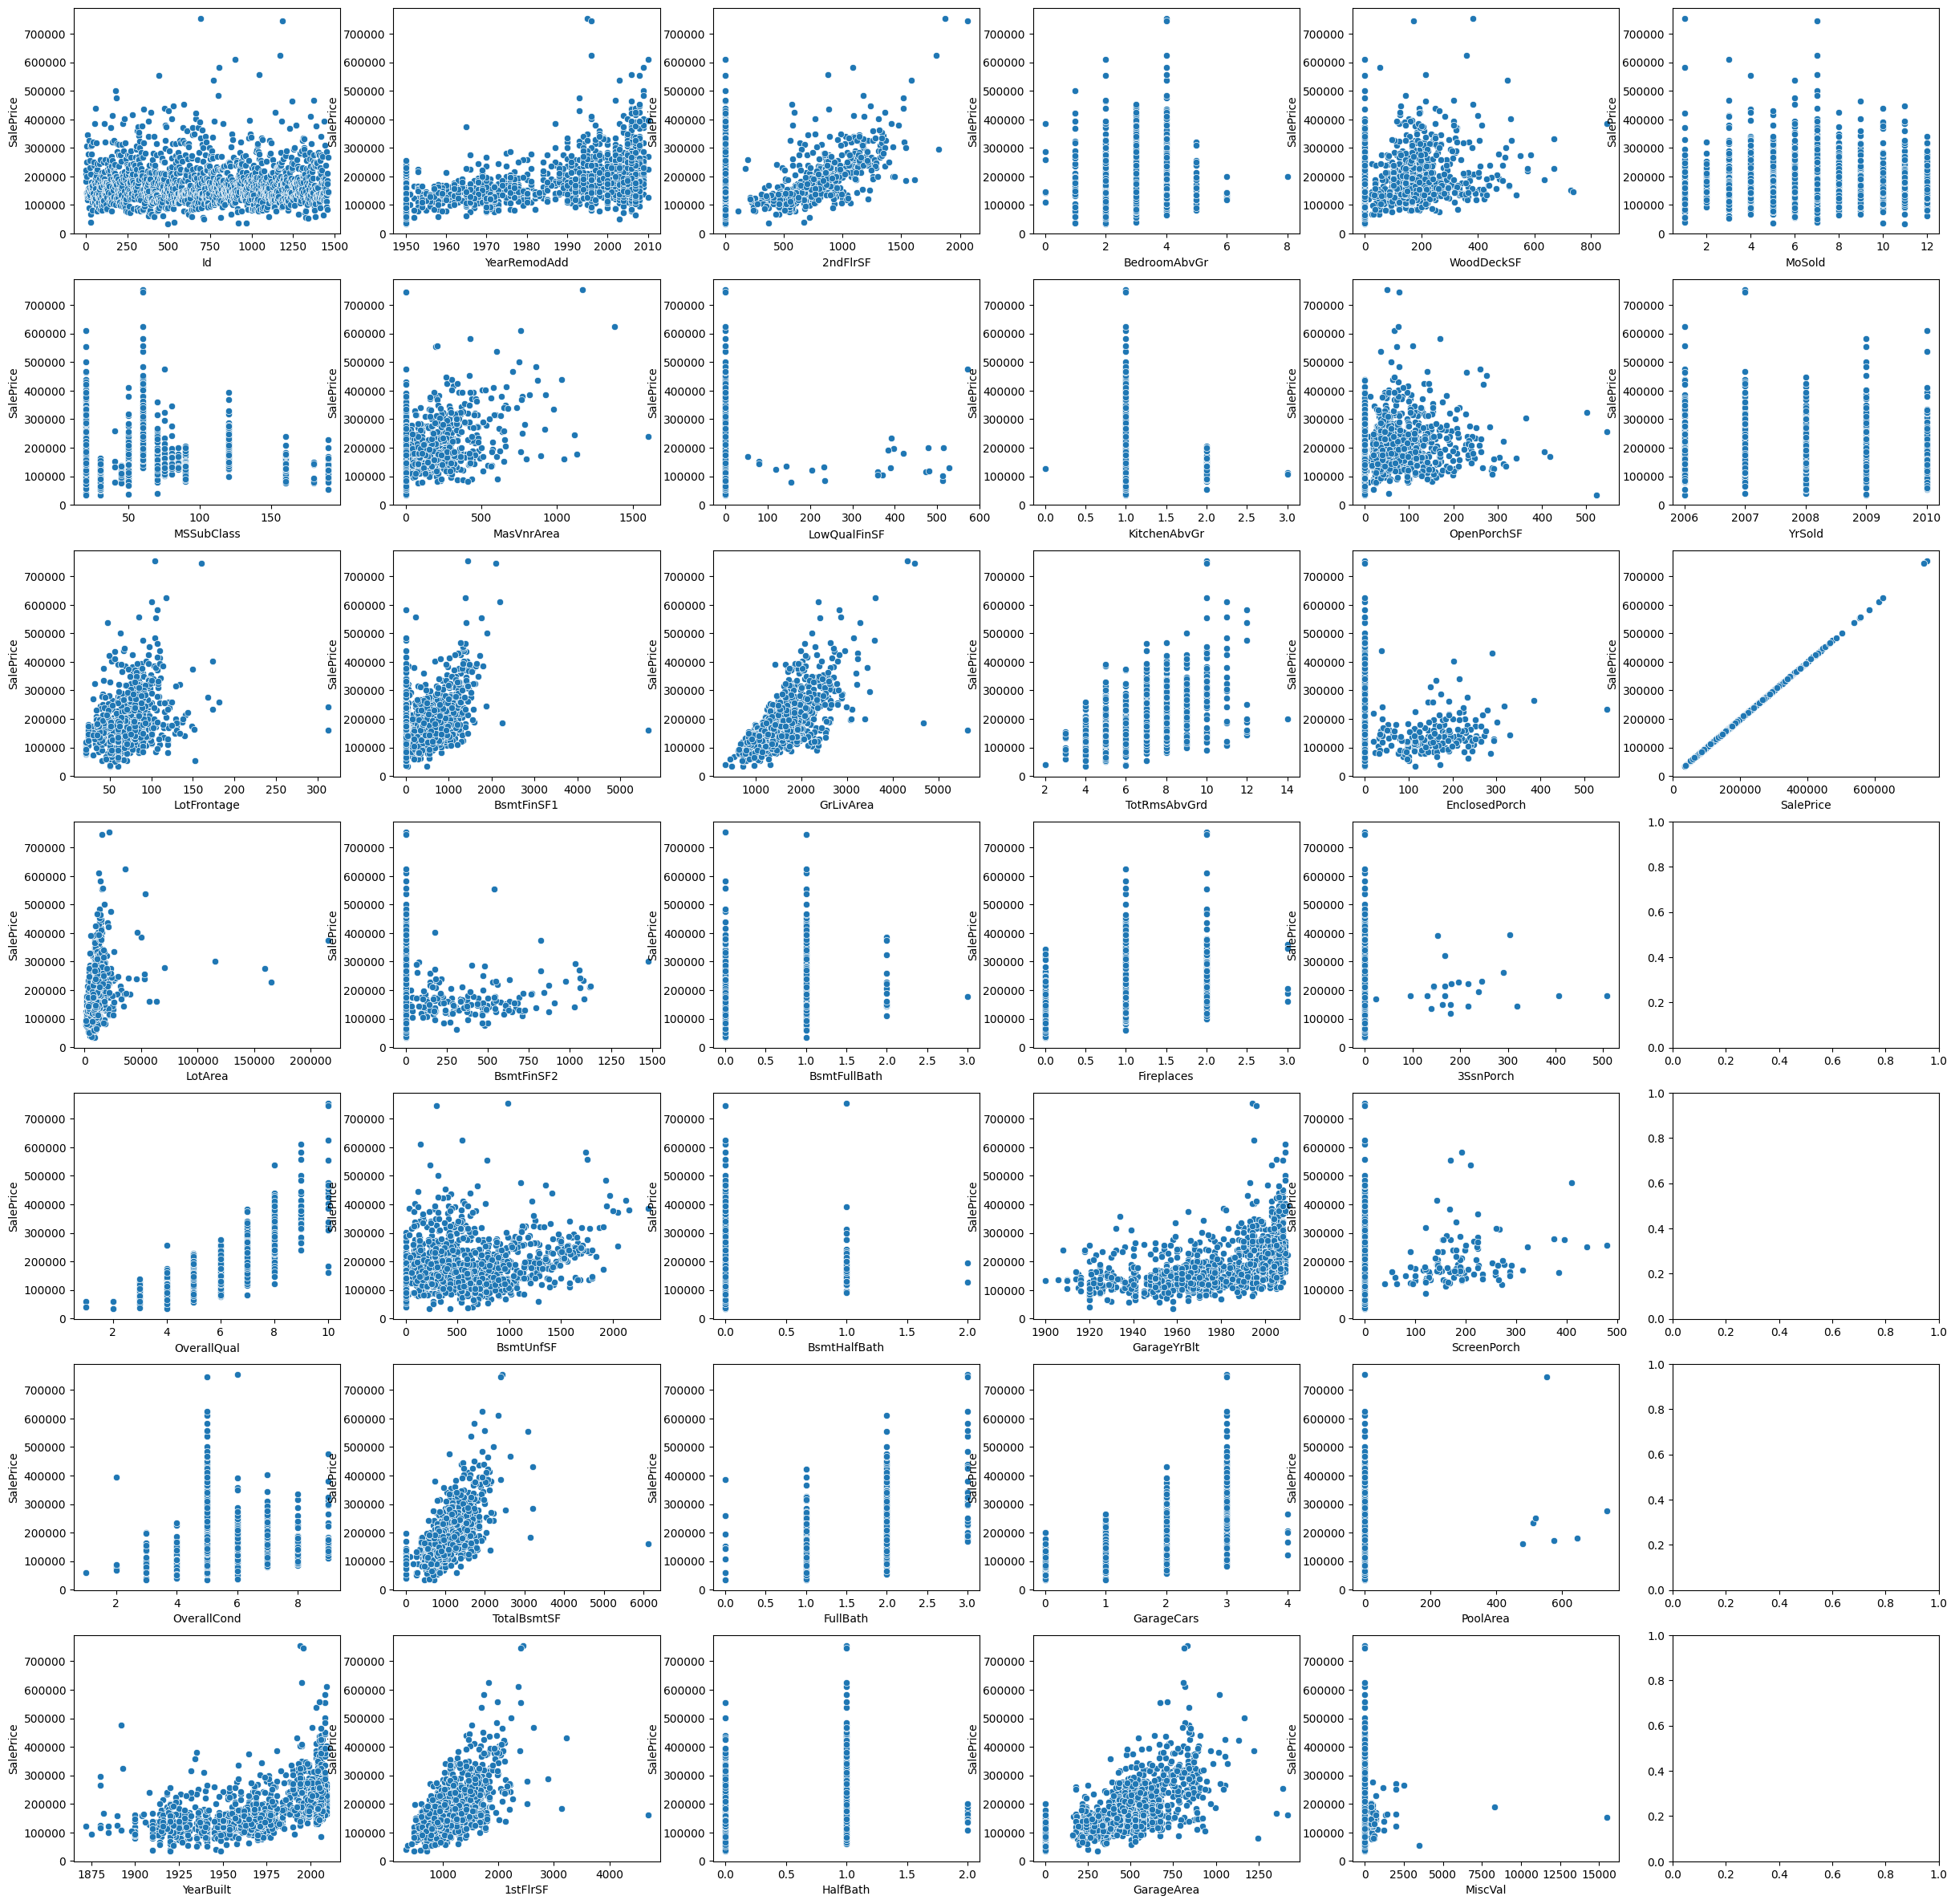

In [ ]:
f, axes = plt.subplots(7,6 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x = feature, y= "SalePrice",ax=axes[i%7, i//7])

In [ ]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()